In [1]:
import sys
sys.path.append("../")
sys.path.append("../ride/")

import numpy as np
from scipy.optimize import curve_fit

# Импорт модулей
from ride.data_loader import load_data
from ride.plot_functions import (
    plot_loglog,
    theoretical_max_acceleration_nodes, 
    theoretical_max_acceleration_density, 
    theoretical_alpha_star_nodes, 
    theoretical_alpha_star_density
)

In [2]:
mypath = '../data/results/'
r = load_data(mypath)

In [3]:
nodes = []
density = []
alpha_opt = []
speed_up_opt = []

for i, name in enumerate(r):
    res = r[name]
    N = res.nodes
    M = res.edges


    def func(x, a):
        k = x * (1 + np.log(x) / np.log(N)) + a / (x ** 0.5)
        return 1 / k


    alpha = [p.alpha for p in res.points_results]
    speed_up = [p.speed_up[0] for p in res.points_results]
    alpha = np.array(alpha)
    speed_up = np.array(speed_up)
    
    popt = curve_fit(func, alpha, speed_up)

    xx = np.linspace(1 / N, 1, 1000)
    yy = func(xx, *popt[0])

    nodes.append(N)
    density.append(2 * M / N / (N - 1))
    alpha_opt.append(alpha[np.argmax(speed_up)])
    speed_up_opt.append(max(speed_up))

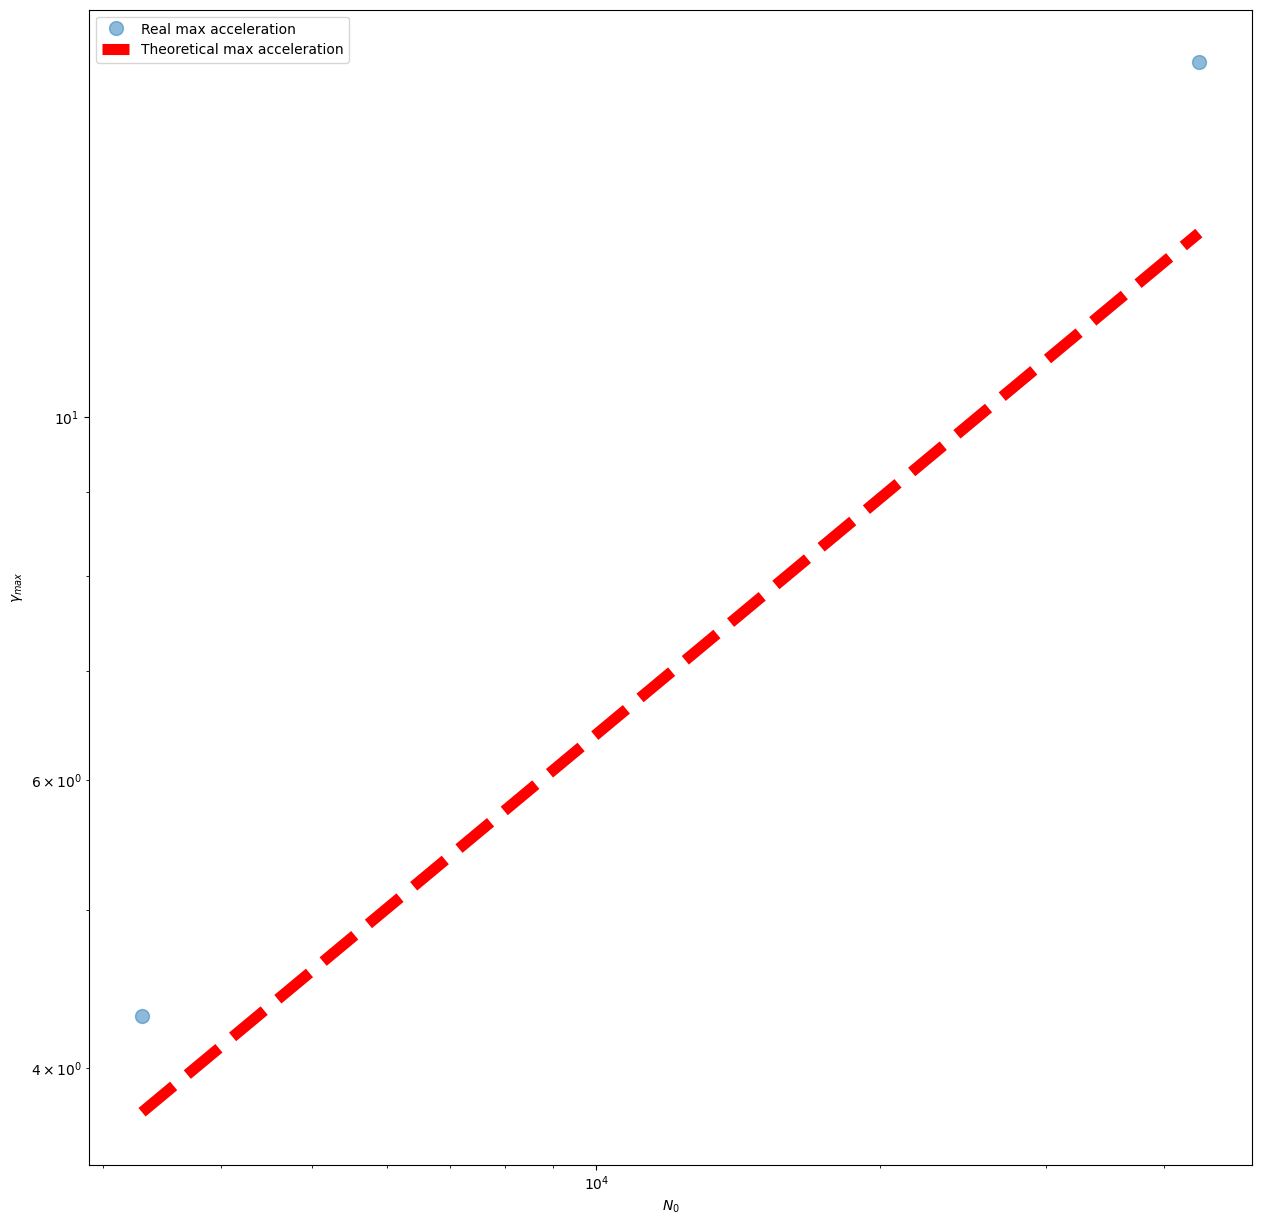

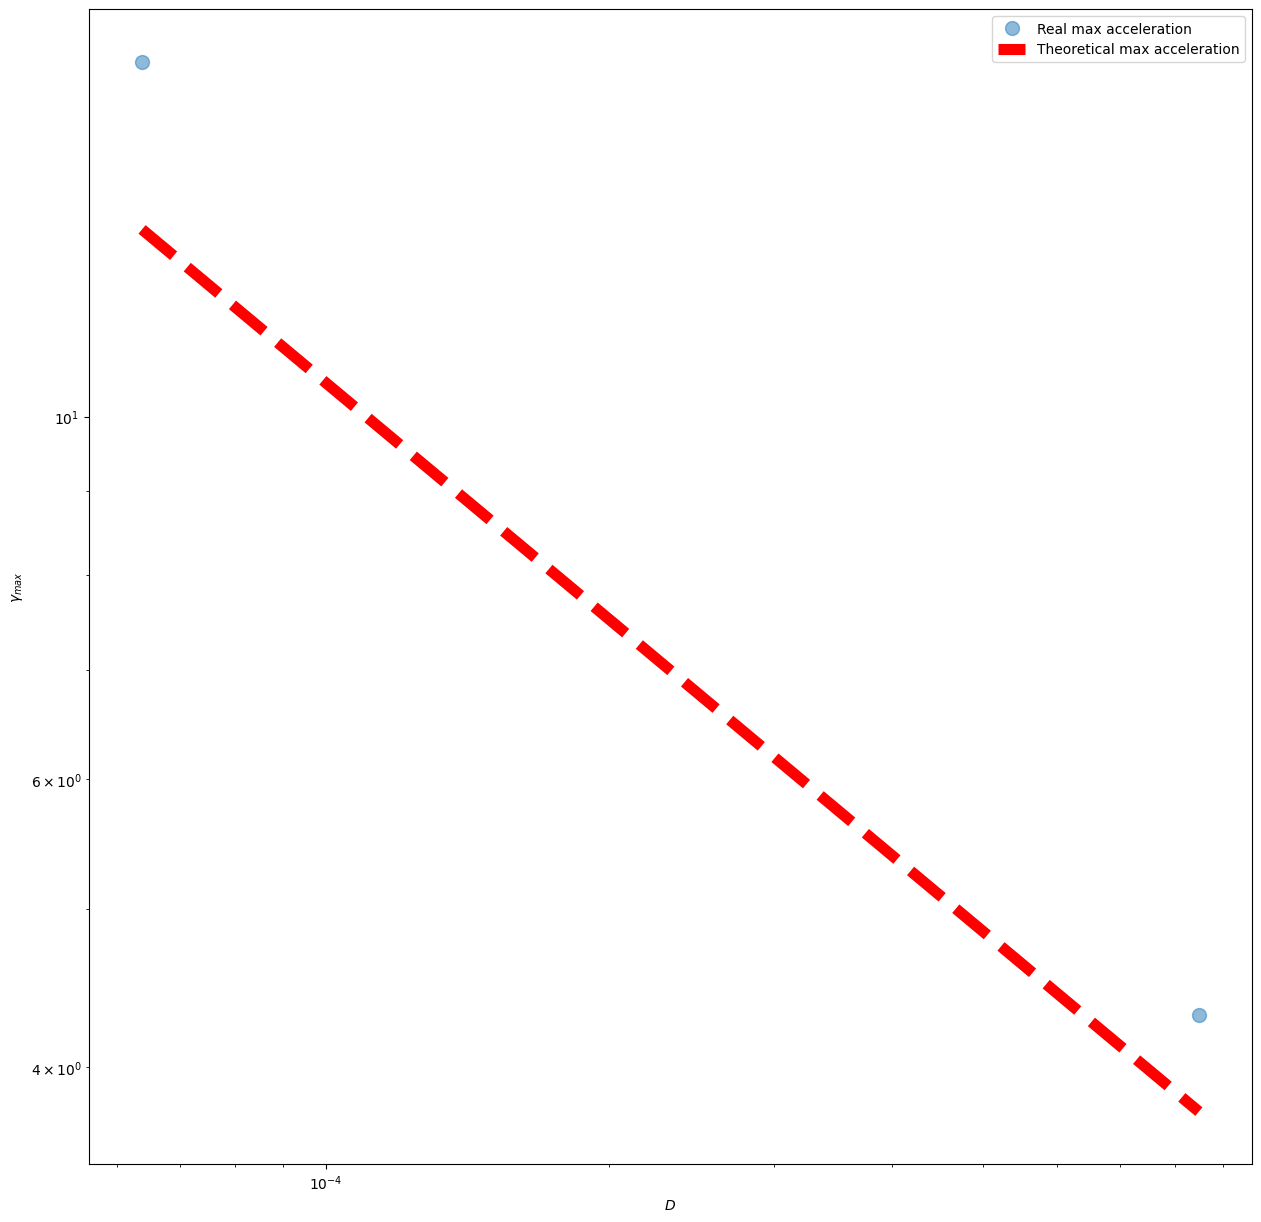

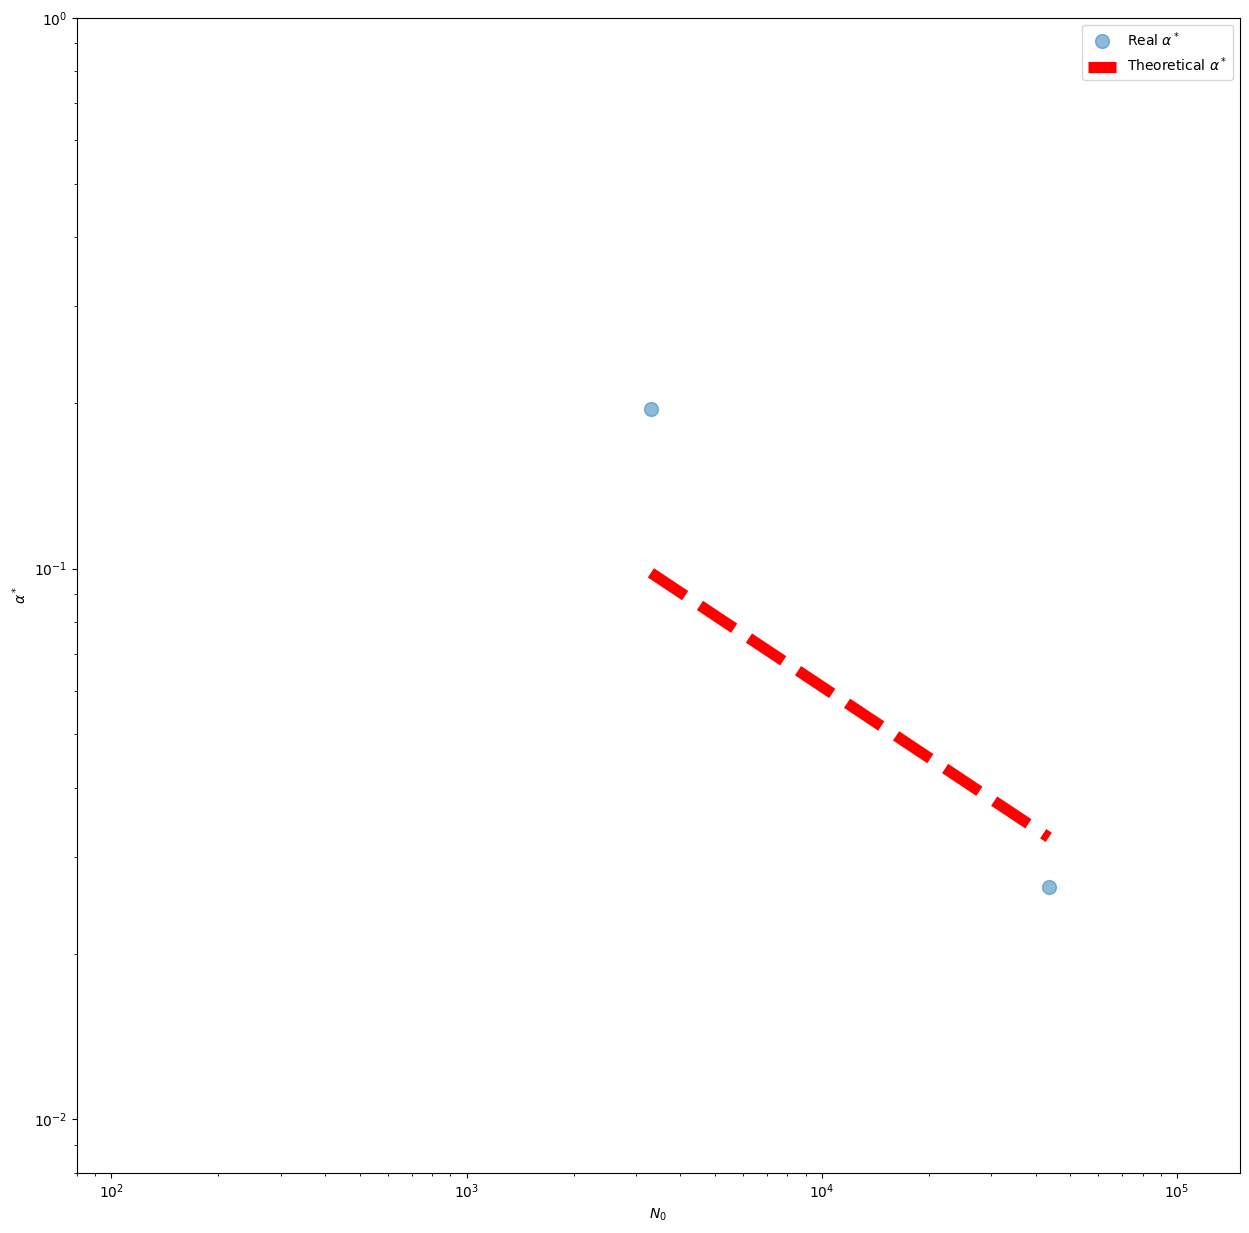

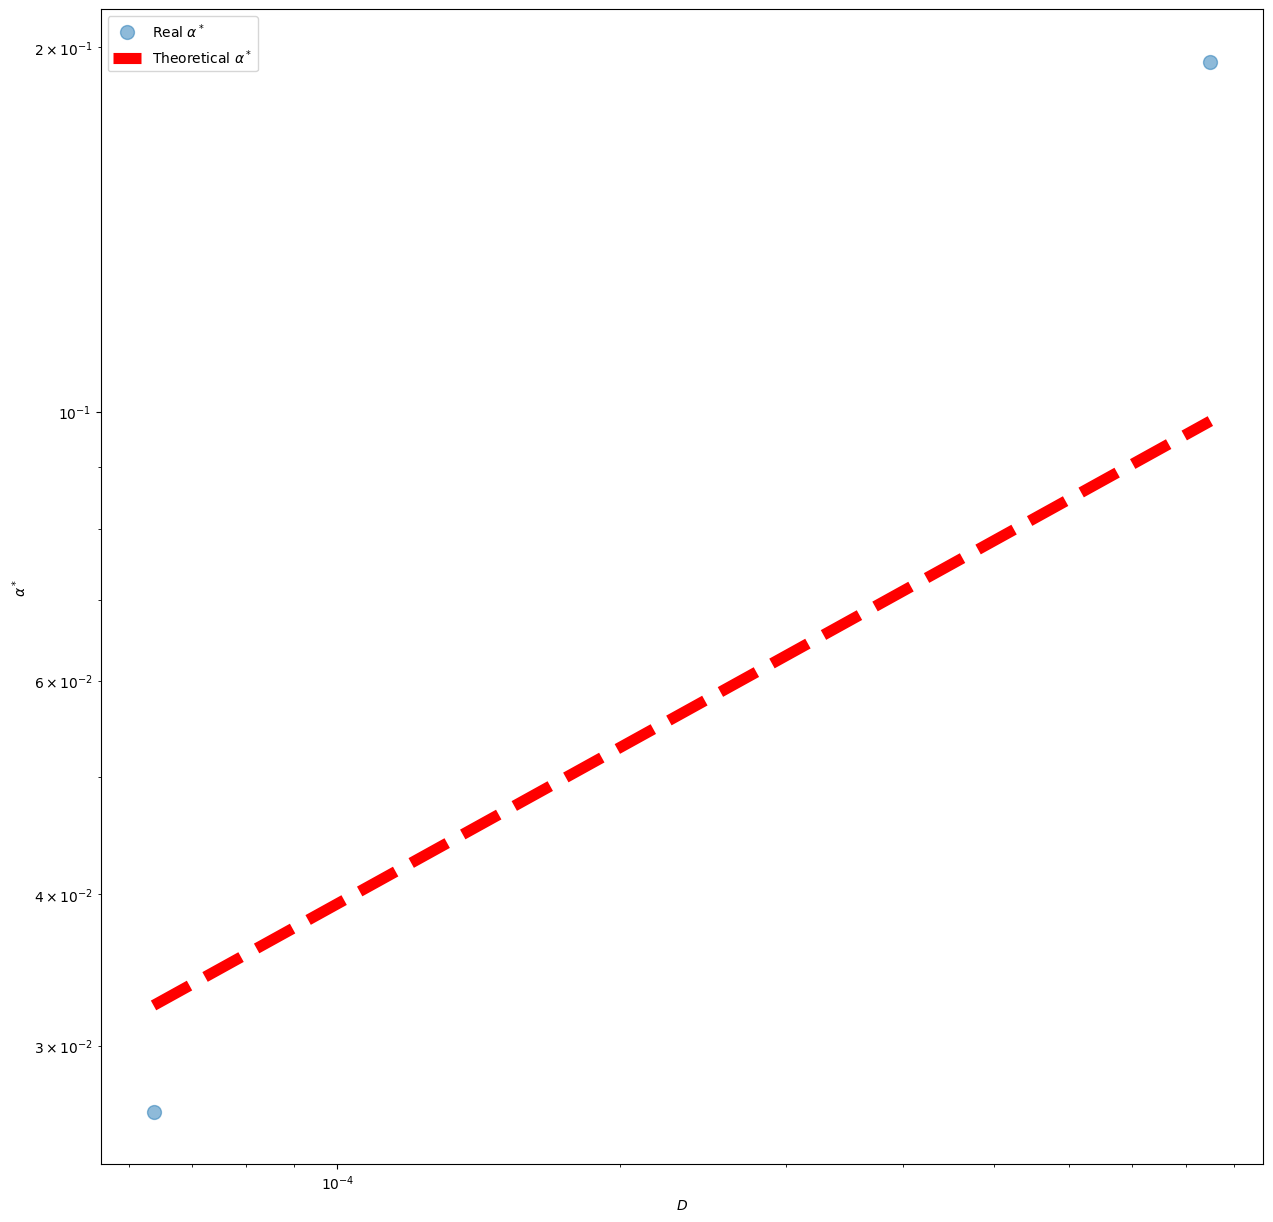

In [4]:
plot_loglog(
    x_data=nodes,
    y_data=speed_up_opt,
    theoretical_curve=theoretical_max_acceleration_nodes,
    x_label=r'$N_0$',
    y_label=r'$\gamma_{max}$',
    legend_real='Real max acceleration',
    legend_theoretical='Theoretical max acceleration'
)

plot_loglog(
    x_data=density,
    y_data=speed_up_opt,
    theoretical_curve=theoretical_max_acceleration_density,
    x_label=r'$D$',
    y_label=r'$\gamma_{max}$',
    legend_real='Real max acceleration',
    legend_theoretical='Theoretical max acceleration'
)

plot_loglog(
    x_data=nodes,
    y_data=alpha_opt,
    theoretical_curve=theoretical_alpha_star_nodes,
    x_label=r'$N_0$',
    y_label=r'$\alpha^*$',
    legend_real=r'Real $\alpha^*$',
    legend_theoretical=r'Theoretical $\alpha^*$',
    y_limits=[10**-2 * 0.8, 1],
    x_limits=[80, 150000]
)

plot_loglog(
    x_data=density,
    y_data=alpha_opt,
    theoretical_curve=theoretical_alpha_star_density,
    x_label=r'$D$',
    y_label=r'$\alpha^*$',
    legend_real=r'Real $\alpha^*$',
    legend_theoretical=r'Theoretical $\alpha^*$'
)